### Data Visualization IS445 (Spring 2024) Final Project - General Public

##### Name of dataset: NFL 2019 play by play data
Dataset link: https://nflsavant.com

Dataset download: https://nflsavant.com/pbp_data.php?year=2019

License: NFLsavant.com’s data is freely and openly available to anyone in public. There is no cost to access and use the data.
    
Size:  pbp-2019.csv is 9.18 MB

##### Characteristics of this dataset:
NFLsavant.com is a web site dedicated to providing advanced NFL statistics in a simple to use interface. All data and stats from this site are compiled from publicly-available NFL play-by-play data on the internet. There are 42,187 rows by 41 columns in the 2019 file. The data consists of strings and numbers.

##### My experience with the dataset:
Initially, I took and started working with the 2023 regular season file. That file was roughly 39K rows and 45 columns. After playing with the data, I discovered that it was incomplete. I assumed that all 272 games were accounted for but learned that the data stopped at Week 14. So, there were 64 games missing from the 2023 statistics. I went back to NFLsavant.com and found that the 2019 season was the most recent complete season featuring 256 games. The thing I like about playing with this data, was that I could confirm different facts online. I noticed 2023 was incomplete when I couldn’t find the Dallas Cowboys longest pass play from Week 17. 


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
# redo the file location of the input data

nflseason = pd.read_csv(r'C:\Users\andre\Downloads\pbp-2019.csv')

In [5]:
df = pd.DataFrame(nflseason)

In [6]:
# Convert the column to datetime and add columns for day of the week and month that the game was played
df['GameDate'] = pd.to_datetime(df['GameDate'])
df['DayOfWeek'] = df['GameDate'].dt.strftime('%a')
df['Month'] = df['GameDate'].dt.strftime('%b')

# Delete rows where the play did not occur because of a TIMEOUT or END QUARTER
indexYardLine = df[(df['YardLine'] == 0)].index
df.drop(indexYardLine, inplace=True)

indexDown = df[(df['Down'] == 0)].index
df.drop(indexDown, inplace=True)

# Delete rows where there wasn't a play that generated yardage
indexPlayType = df[(df['PlayType'] == 'CLOCK STOP') | (df['PlayType'] == 'EXCEPTION') | (df['PlayType'] == 'EXTRA POINT') | (df['PlayType'] == 'FIELD GOAL') | (df['PlayType'] == 'FUMBLES') | (df['PlayType'] == 'KICK OFF')  | (df['PlayType'] == 'TWO-POINT CONVERSION') | (df['PlayType'] == 'NO PLAY')   | (df['PlayType'] == 'TIMEOUT')| (df['PlayType'] == 'PENALTY')| (df['PlayType'] == 'QB KNEEL') | (df['PlayType'] == 'PUNT')].index
df.drop(indexPlayType, inplace=True)


### Displaying total yardage for the league by month and type of play

Month      Dec   Nov   Oct   Sep
PlayType                        
PASS      4246  4291  4220  4762
RUSH      2751  2680  2925  2979
SACK       278   334   317   337
SCRAMBLE   195   186   198   184


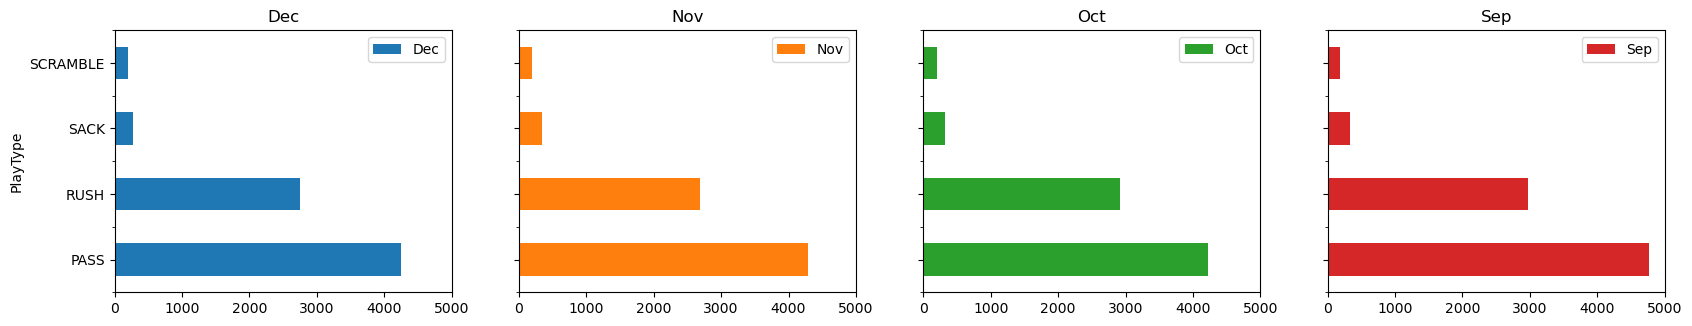

In [14]:
# I took the eariler pivot table and started to change the aggfunc... rather than add the yardage, wanted to see how many passes and runs happened by month.

pivot_table = pd.pivot_table(df.reset_index(), index='PlayType', columns='Month', values='Yards', aggfunc='count')
pivot_table.plot(subplots=True, layout=(8,4), figsize=(20,32), kind='barh', sharex=True, sharey=True)
print(pivot_table)

### Displaying average yardage for the league by type of play and the down in which it occured

Down        1    2    3    4
PlayType                    
PASS      7.9  7.1  7.2  6.8
RUSH      4.5  4.5  3.7  2.4
SACK     -6.3 -6.4 -7.1 -7.8
SCRAMBLE  6.8  6.9  8.1  7.8


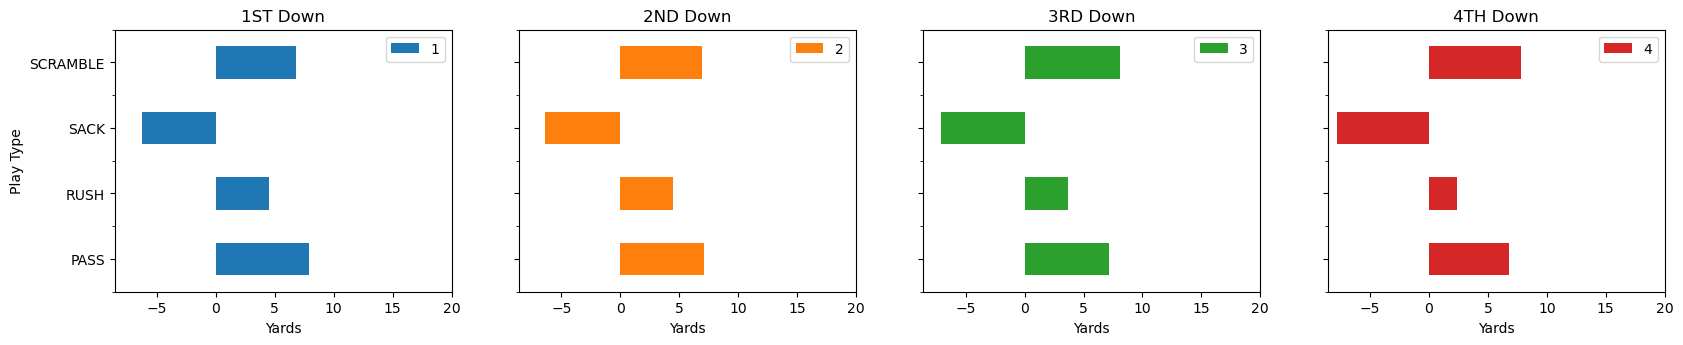

In [15]:
# Same as above but wanted to see the average for each play on each down for the whole league.

pivot_table = pd.pivot_table(df.reset_index(), index='PlayType', columns='Down', values='Yards', aggfunc='mean').round(1)
pivot_table.plot(subplots=True, title=['1ST Down', '2ND Down', '3RD Down', '4TH Down'], xlabel='Yards', ylabel='Play Type', layout=(8,4), figsize=(20,32), kind='barh', xticks=[-5, 0, 5, 10, 15, 20], sharex=True, sharey=True)
print(pivot_table)

### Displaying average yardage per play within a down for the worst team that season, the 2-14 Cincinnati Bengals

Down         1    2    3     4
PlayType                      
PASS       7.3  6.7  5.8  11.7
RUSH       4.0  4.3  2.5   1.5
SACK      -7.2 -6.7 -7.2  -8.0
SCRAMBLE  11.7  3.3  5.5   NaN


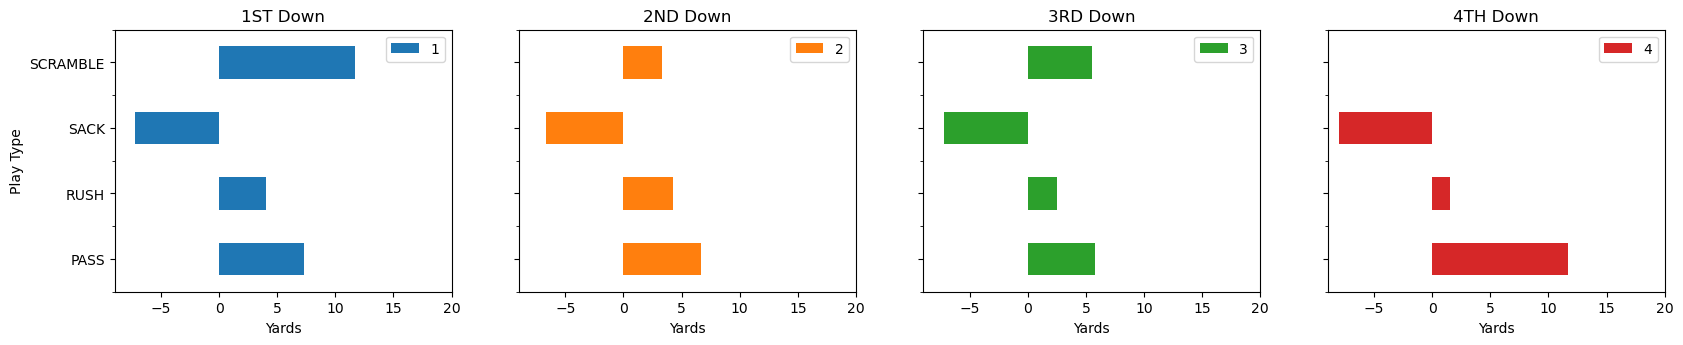

In [13]:
# What can I tell from looking at just one team? 
# Using the same table, but filtering the data to look at the worst team in 2019, the 2-14 Cincinnati Bengals. I can see that their passing and rushing was below the league average.


filteredCIN_df = df[(df['OffenseTeam'] == 'CIN')]
pivot_table = pd.pivot_table(filteredCIN_df.reset_index(), index='PlayType', columns='Down', values='Yards', aggfunc='mean').round(1)
pivot_table.plot(subplots=True, title=['1ST Down', '2ND Down', '3RD Down', '4TH Down'], xlabel='Yards', ylabel='Play Type', layout=(8,4), figsize=(20,32), kind='barh', xticks=[-5, 0, 5, 10, 15, 20], sharex=True, sharey=True)
print(pivot_table)

### Displaying average yardage per play within a down for the best team that season, the 14-2 Baltimore Ravens

Down        1    2     3     4
PlayType                      
PASS      7.7  7.7   7.9   8.5
RUSH      5.5  6.1   4.2  13.7
SACK     -4.1 -4.2  -5.6   NaN
SCRAMBLE  6.5  9.7  15.3   7.0


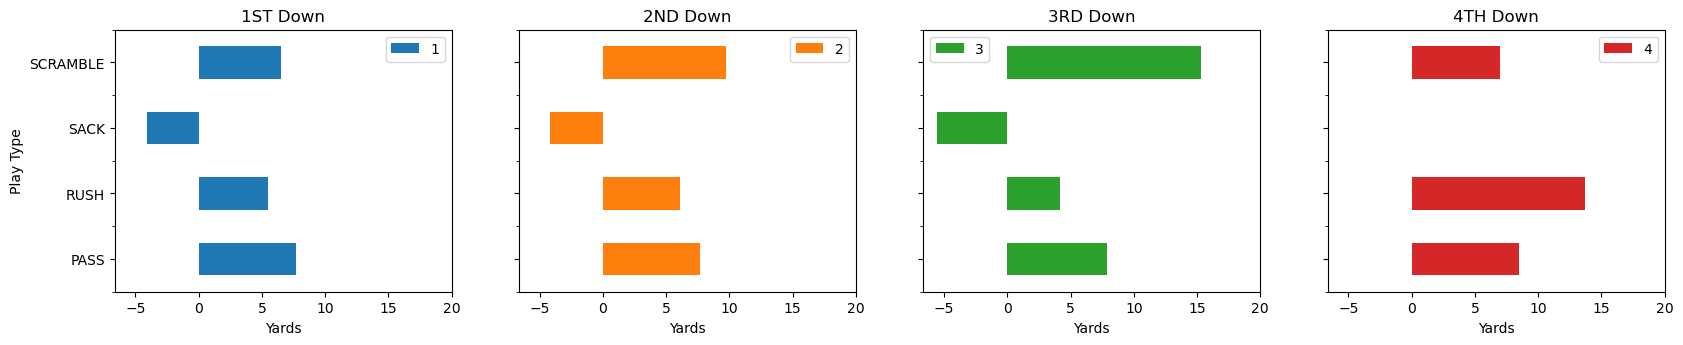

In [16]:
# What was the average yardage per play by down for the season for the best team - Baltimore Ravens? 14-2 record

filteredBAL_df = df[(df['OffenseTeam'] == 'BAL')]
pivot_table = pd.pivot_table(filteredBAL_df.reset_index(), index='PlayType', columns='Down', values='Yards', aggfunc='mean').round(1)
pivot_table.plot(subplots=True, title=['1ST Down', '2ND Down', '3RD Down', '4TH Down'], xlabel='Yards', ylabel='Play Type', layout=(8,4), figsize=(20,32), kind='barh', xticks=[-5, 0, 5, 10, 15, 20], sharex=True, sharey=True)
print(pivot_table)


### Displaying total yards by down for one team, Kansas City

Down          1      2      3    4
PlayType                          
PASS      245.0  206.0  154.0  2.0
RUSH      185.0  101.0   29.0  6.0
SACK        9.0    6.0   14.0  NaN
SCRAMBLE   10.0    9.0    6.0  1.0


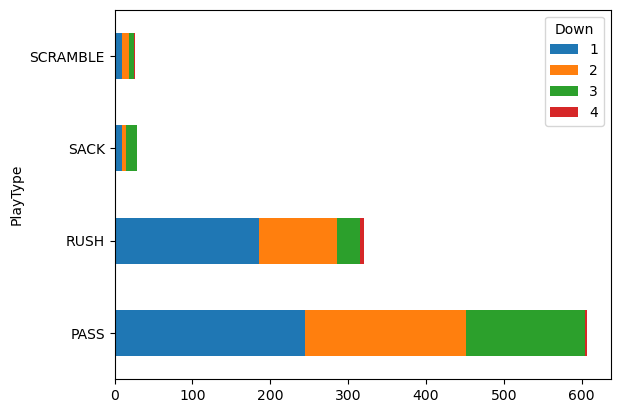

In [10]:
# Tried stacking rather than having seperate charts by down

filteredKC_df = df[(df['OffenseTeam'] == 'KC')]
pivot_table = pd.pivot_table(filteredKC_df.reset_index(), index='PlayType', columns='Down', values='Yards', aggfunc='count')
pivot_table.plot(kind='barh', stacked=True)
print(pivot_table)